# Introducction





I have created a convolutional neural network (CNN) for image classification on the CIFAR-10 dataset. I used the Tensorflow and Kera libraries to build the model.


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into four training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.



# Libraries 

Importing packages

In [1]:
import numpy as np 
import pandas as pd 
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout, Activation,Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.datasets import cifar10
#from vit_keras import vit, utils
#import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import gc


import warnings 
warnings.filterwarnings('ignore')

Loading the Dataset

In [2]:
x_train = np.load('x_train.npy')

In [3]:
x_test= np.load('x_test.npy')

In [4]:
y_test= np.load('y_test.npy')

In [5]:
y_train = np.load('y_train.npy')

In [6]:
x_train.shape


(50000, 32, 32, 3)

In [7]:
x_test.shape


(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

# Define the class each item of array represent integer value of labels.


In [10]:
classes =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
classes

['Airplane',
 'Automobile',
 'Bird',
 'Cat',
 'Deer',
 'Dog',
 'Frog',
 'Horse',
 'Ship',
 'Truck']

# Evaluation of the data 

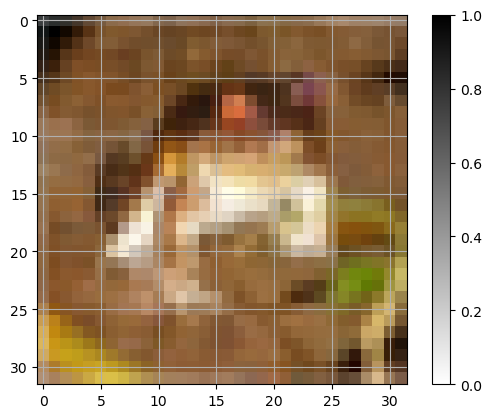

Class ID=> [6] and Class name : Frog


In [11]:
index=0   
plt.imshow(x_train[index], cmap=plt.cm.binary) # printing 10th image. 
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) 
plt.show()# Show images
print("Class ID=> %s and Class name : %s" % (y_train[index], classes[y_train[index][0]]))

# Show images

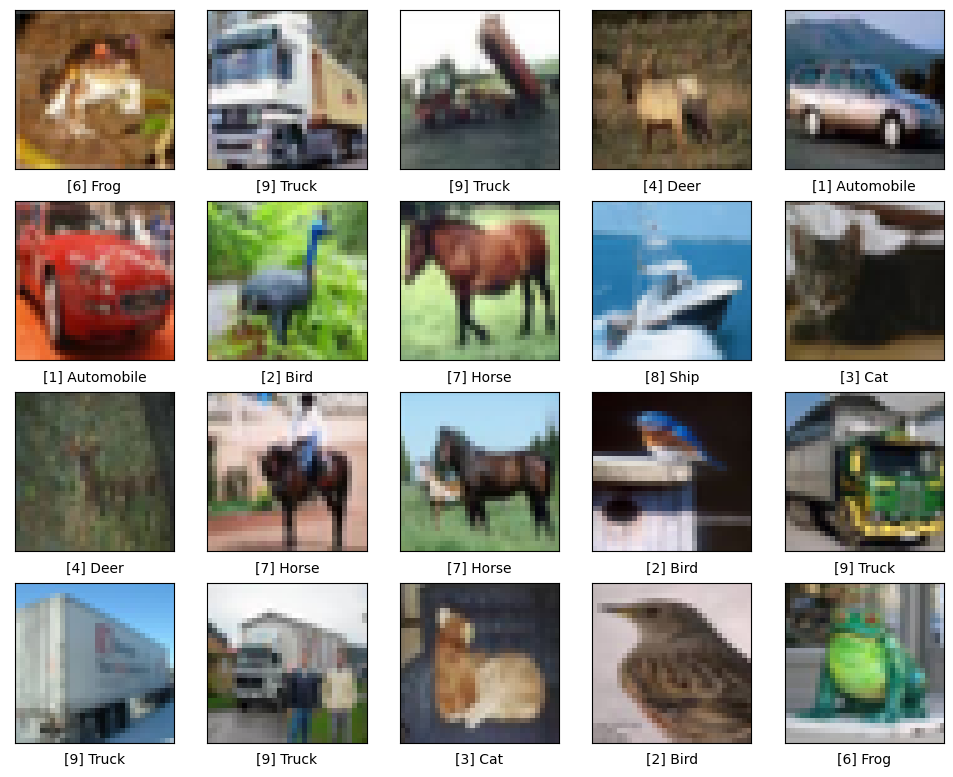

In [12]:
# Assigning name to each image
plt.figure(figsize=(12,12))
for i in range(20): # 20 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary) 
    
  plt.xlabel("%s %s" % (y_train[i], classes[y_train[i][0]])) 
plt.show()

# Data Preparation

Scaling the image values

In [13]:
x_train = x_train/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(x_train.shape)

x_test = x_test/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


# One hot encoding of the labels.

In [39]:
# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (y_train.shape, y_train))
print("ytest Shape: %s and value: %s" % (y_test.shape,y_test))

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# After one hot encoding
print("y_train Shape: %s and value: %s" % (y_train.shape, y_train[0]))
print("y_test Shape: %s and value: %s" % (y_test.shape, y_test[1]))

ytrain Shape: (50000, 1) and value: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
ytest Shape: (10000, 1) and value: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
y_train Shape: (50000, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y_test Shape: (10000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# Modelling - Model on CNN

In [40]:
model=models.Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
#Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Add Second convolutional block
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(32,32))) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(100, activation='relu'))  
model.add(layers.Dense(80, activation='relu'))  

#Add the output layer
model.add(layers.Dense(10, activation='softmax')) 

# Ploting the Model
print(model)

# Compile the model

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                      

# Train the model

In [21]:
x_train1=x_train.reshape(50000,32,32,3)
x_test1=x_test.reshape(10000,32,32,3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [22]:
model.fit(x_train1,y_train,epochs=20,batch_size=50,verbose=True,validation_data=(x_test1,y_test))

Epoch 1/20
1000/1000 [==============================] - 572s 560ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
1000/1000 [==============================] - 505s 505ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
1000/1000 [==============================] - 559s 559ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
1000/1000 [==============================] - 545s 546ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
1000/1000 [==============================] - 563s 563ms/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
1000/1000 [==============================] - 609s 609ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1000/1000 [==============================] - 573s 573ms/step - loss: 2.3028 - accuracy: 0.0975 - val_

# Evaluate the model accuracy 

In [23]:
test_loss, test_acc = model.evaluate(x_test1, y_test)
print("accuracy:", test_acc)

313/313 [==============================] - 22s 67ms/step - loss: 2.3026 - accuracy: 0.1000
accuracy: 0.10000000149011612
